In [1]:
# Import Pandas and NumPy


# importing numpy be used as an efficient multi-dimensional container of generic data.
import numpy as np  

#importing pandas it allows you to perform data manipulation create, manipulate and wrangle the data in python.
import pandas as pd


#   ---------- # Visualizations---------

# Import Libraries for plotting 

#Matplotlib is a Python 2D plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn is high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns


# importing NLTK (Natrual Language Tool Kit)
import nltk
#importing stopwords
from nltk.corpus import stopwords

#import string
import string


# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import re


In [2]:
# Read the data of credit card fraud detection
# Here file is CSV i.e Comma Seperated Values
#df is a variable

df = pd.read_csv("spam.csv")

In [3]:
df.head()
#Understand your data using the head() function to look at the first few rows.

# Checking the first 5 rows

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.Label.value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

In [5]:

print("There are {} rows and {} columns are present in the Data Set".format(df.shape[0],df.shape[1]))

#printing the rows and columns 

There are 5572 rows and 2 columns are present in the Data Set


In [6]:
df.info()

# # To know the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Label      5572 non-null   object
 1   EmailText  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.dtypes

Label        object
EmailText    object
dtype: object

In [8]:
df.describe()

,Label,EmailText
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
df.groupby('Label').describe().T
# Describe the Label column for better understanding

Label                                ham  \
EmailText count                     4825   
          unique                    4516   
          top     Sorry, I'll call later   
          freq                        30   

Label                                                          spam  
EmailText count                                                 747  
          unique                                                653  
          top     Please call our customer service representativ...  
          freq                                                    4

In [10]:
df.isnull().sum()


Label        0
EmailText    0
dtype: int64

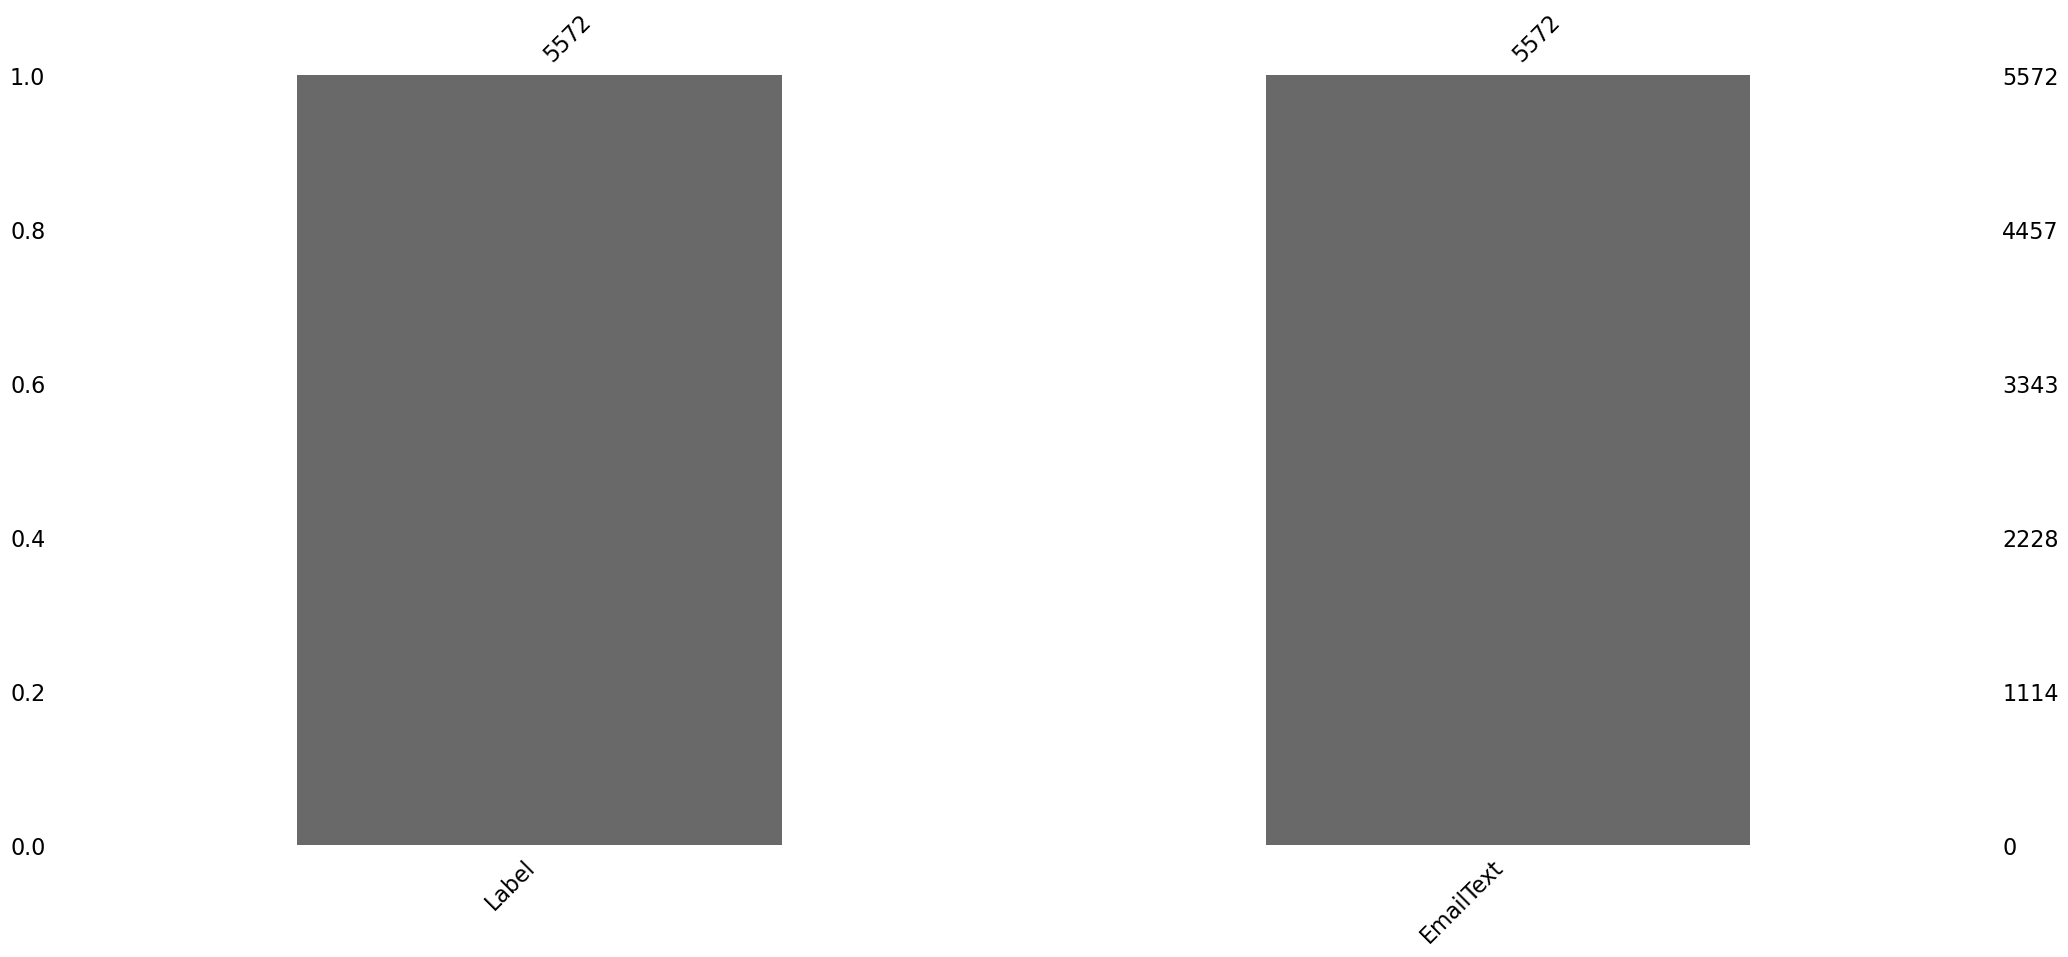

In [13]:
#visualizing the null values for each attribute


import missingno as msno

#msgo ---->  It's also the name of a Python library for the exploratory visualization of missing data.

msno.bar(df)
#ploting the bar graph

plt.show()
#Show the image

Counter({'ham': 4825, 'spam': 747})


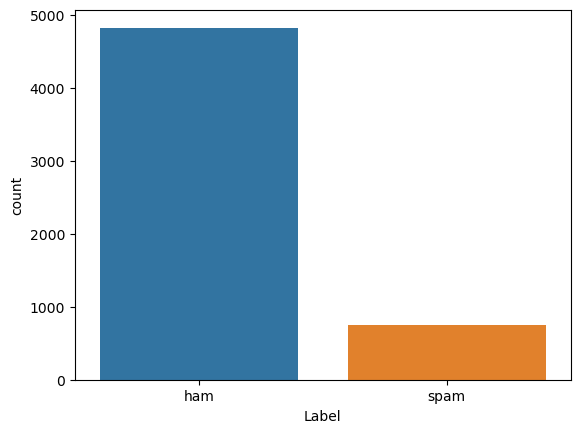

In [14]:
sns.countplot(x='Label', data = df)
#is used to Show the counts of observations in each categorical bin using bar


from collections import Counter
#Counter is a container which stores the count of elements in a dictionary format where element is the key and its value corrosponds to it's count.

counter = Counter( df [ 'Label' ])
#passing 'Class' feature in the Counter , it tells no. of 1s and 0s present in the dataset

print(counter)
#print the counter variable



In [15]:
duplicatedRow = df[df.duplicated()]
print(duplicatedRow[:])

     Label                                          EmailText
102    ham  As per your request 'Melle Melle (Oru Minnamin...
153    ham  As per your request 'Melle Melle (Oru Minnamin...
206    ham  As I entered my cabin my PA said, '' Happy B'd...
222    ham                             Sorry, I'll call later
325    ham                   No calls..messages..missed calls
...    ...                                                ...
5524  spam  You are awarded a SiPix Digital Camera! call 0...
5535   ham  I know you are thinkin malaria. But relax, chi...
5539   ham                         Just sleeping..and surfing
5553   ham                        Hahaha..use your brain dear
5558   ham                             Sorry, I'll call later

[403 rows x 2 columns]


In [16]:
#drop the duplicates by using duplicate maethod
df.drop_duplicates(inplace = True)

In [17]:
#show the new shape having number of rows and columns after duplication is dropped

print("There are {} rows and {} columns are present in the Data Set".format(df.shape[0],df.shape[1]))

#printing the rows and columns 

There are 5169 rows and 2 columns are present in the Data Set


In [18]:
from nltk.corpus import stopwords # for stop words

In [19]:


def pre_processing(text):
    
    text = str(text).lower()  # Converted into lower case
    
    spl_char_text = re.sub(r'[^a-z]',' ',text) # removed numbers and special characters
    
    # remove aall punctuation
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    # remove all stop words
    
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    # return a list of clean text
    return clean_words
    


In [20]:
df['EmailText'].head().apply(pre_processing)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\AB/nltk_data'
    - 'C:\\Users\\AB\\anaconda3\\nltk_data'
    - 'C:\\Users\\AB\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\AB\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\AB\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
#import a CountVectorizer

In [22]:
# convvert a collection of EmailText to a matrix of tokens

bow = CountVectorizer(analyzer= pre_processing).fit_transform(df['EmailText'],df['Label'])

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\AB/nltk_data'
    - 'C:\\Users\\AB\\anaconda3\\nltk_data'
    - 'C:\\Users\\AB\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\AB\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\AB\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [23]:
 df1 = pd.get_dummies(df, columns=['Label'], drop_first=True)

#spam = 1
#Ham =0

In [24]:
df1

,EmailText,Label_spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ã_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [25]:
#Lets check the shape of the data, after pre_process,removed stopwords
bow.shape

NameError: name 'bow' is not defined

In [26]:

#importing train_test_split
from sklearn.model_selection import train_test_split

## split into train tests sets
x_train,x_test,y_train,y_test=train_test_split(bow,df1["Label_spam"],test_size=0.2)

NameError: name 'bow' is not defined

In [27]:
# import the SVM

from sklearn import svm

#import GridSearchCV to know the best parameters
from sklearn.model_selection import GridSearchCV

In [28]:
##Step: Build a model

# Tunne all the parameters
tuned_parameters = {'kernel': ['rbf','linear'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}

#train the model with  perfrom all kernels, gamma, C 
model = GridSearchCV(svm.SVC(), tuned_parameters)

#Build the model and fit to train and test

model.fit(x_train,y_train)


#See the best parameters
print(model.best_params_)

NameError: name 'x_train' is not defined

In [29]:
#Train the model, using the best parameters

model1=svm.SVC(C= 100, gamma= 0.001, kernel= 'rbf',probability=True)

In [30]:
# fit the model on x_train, y_train
model1.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [31]:
#predict the model on test 
y_pred=model1.predict(x_test)

NameError: name 'x_test' is not defined

In [32]:
#predict the models and probabilities
y_pred_proba=model1.predict_proba(x_test)[:,1]

NameError: name 'x_test' is not defined

In [33]:
#check the all probabilities
y_pred_proba

NameError: name 'y_pred_proba' is not defined

In [ ]:
#import the libraries for stats metrices
import numpy as np

#importing the Confusion matrix metrics and classification reports
from sklearn.metrics import confusion_matrix, classification_report

#Importing cohen_kappa_score and roc_auc_score metrices
from sklearn.metrics import cohen_kappa_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

#importing visualizing library
import matplotlib.pyplot as plt
import seaborn as sns

#logloss to check is there loss or difference
from sklearn.metrics import log_loss

#Creating a Function name called Classification Metric
def classification_metric(y_test,y_pred,y_prob,label,n=1,verbose=False):
    """
    Note: only for binary classification
    confusionmatrix(y_true,y_pred,labels=['Ham','Spam'])
    """
    # confusion matrix
    
    cm = confusion_matrix(y_test,y_pred)
    row_sum = cm.sum(axis=0)
    cm = np.append(cm,row_sum.reshape(1,-1),axis=0)
    col_sum = cm.sum(axis=1)
    cm = np.append(cm,col_sum.reshape(-1,1),axis=1)

    labels = label+['Total']
    
    plt.figure(figsize=(10,6))
    #plotting a fig size as 10 width and 6 height
    
    
    sns.heatmap(cm,annot=True,cmap='summer',fmt='0.2f',xticklabels=labels,
                yticklabels=labels,linewidths=3,cbar=None,)
    #create a heapmap using seaborn libarary and used various parametere

    plt.xlabel('Predicted Values')
    #ploting the values on x- axis as Predicted values
    
    plt.ylabel('Actual Values')
    #ploting the values on y- axis as actual values
    
    plt.title('Confusion Matrix')
    # Mentioning the title of the figure
    
    plt.show()
    #show the image
    
    print('*'*30+'Classifcation Report'+'*'*30+'\n\n')
    #showing * are to put a  line to style
    
    #created classification report
    cr = classification_report(y_test,y_pred)
    
    #print the classifiaction report
    print(cr)
    
    print('\n'+'*'*36+'Kappa Score'+'*'*36+'\n\n')
    
    
    # Kappa score
    kappa = cohen_kappa_score(y_test,y_pred) # Kappa Score
    print('Kappa Score =',kappa)
    
    print('\n'+'*'*30+'Area Under Curve Score'+'*'*30+'\n\n')
    # Kappa score
    roc_a = roc_auc_score(y_test,y_pred) # Kappa Score
    print('AUC Score =',roc_a)
    
    # ROC
    
    
    plt.figure(figsize=(8,5))
    #plot the figuare based on width and height sizes
    
    fpr,tpr, thresh = roc_curve(y_test,y_prob)
    #fpr false positive rate
    #tpr true positive rate
    
    plt.plot(fpr,tpr,'r')
    print('Number of probabilities to build ROC =',len(fpr))
    if verbose == True:
        for i in range(len(thresh)):
            if i%n == 0:
                plt.text(fpr[i],tpr[i],'%0.2f'%thresh[i])
                plt.plot(fpr[i],tpr[i],'v')


    plt.xlabel('False Positive Rate')
    #fpr on x -axis 
    
    plt.ylabel('True Positive Rate')
    #tpr on y axis
    
    plt.title('Receiver Operating Characterstic')
    #mentioning the title of the figuare
    
    plt.legend(['AUC = {}'.format(roc_a)])
    #assign the legend to the figuare
    
    plt.plot([0,1],[0,1],'b--',linewidth=2.0)
    #mentioning then line width as 2.0
    
    plt.grid()
    # show the grid lines to the image
    
    plt.show()
    #display the image
    
  # A point beyond which there is a change in the manner a program executes  
class threshold():
    '''
    Setting up the threshold points
    '''
    def __init__(self):
        self.th = 0.5
        
    def predict_threshold(self,y):
        if y >= self.th:
            return 1
        else:
            return 0

In [ ]:
#Calling the Classification_metric function. It will displays all the metrices which are we created earlier

classification_metric(y_test,y_pred,y_pred_proba,['ham','spam'],n=10,verbose=True)

# VERBOSE : This flag allows you to write regular expressions that look nicer and are more readable by allowing you to visually separate logical sections of the pattern and add comments.